In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2971 sha256=2bb7e0b16af68634e38ae1facf73106467db856cc178b3eeaf86d221187c45dd
  Stored in directory: c:\users\shey pandey\appdata\local\pip\cache\wheels\36\49\c9\2374f1dee1b599effabf63d948635e6608f62d0ccde027b7e2
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras. callbacks import EarlyStopping
from keras. optimizers import Adam
from keras.models import load_model
from keras. layers import LSTM
from keras. utils.vis_utils import plot_model

In [2]:
#Get the Dataset
df=pd.read_csv("tata-steel-data.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-17,107.40,107.50,105.55,106.00,106.00,28895465.0
2023-05-16,108.20,108.65,107.20,107.40,107.40,18587658.0
2023-05-15,107.05,108.20,105.65,107.70,107.70,22148028.0
2023-05-12,108.35,108.40,106.55,106.75,106.75,36794838.0
2023-05-11,109.20,109.50,108.25,108.55,108.55,19817637.0


In [43]:
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (2066, 6)
Null Value Present:  False


<AxesSubplot:xlabel='Date'>

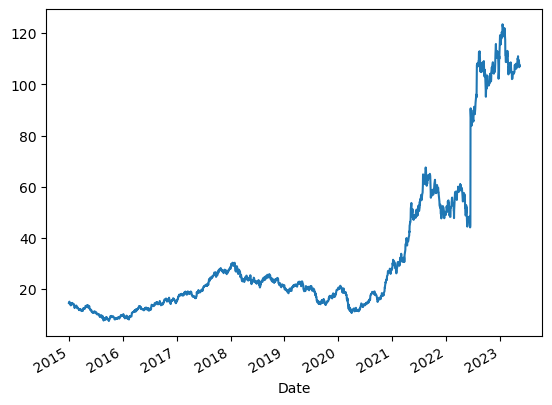

In [44]:
df["Adj Close"].plot()

In [47]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [48]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2023-05-16,0.669662,0.665072,0.677449,0.022622
2023-05-15,0.660977,0.661708,0.665540,0.028197
2023-05-12,0.670795,0.663203,0.672455,0.051128
2023-05-11,0.677215,0.671426,0.685517,0.024548
2023-05-10,0.680236,0.675164,0.688206,0.023602


In [49]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


In [50]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [51]:
history=lstm.fit(X_train, y_train, epochs=30, batch_size=8, verbose=1, shuffle=False)

Epoch 1/30
235/235 [==============================] - 5s 4ms/step - loss: 2089.1216
Epoch 2/30
235/235 [==============================] - 1s 4ms/step - loss: 1890.6245
Epoch 3/30
235/235 [==============================] - 1s 4ms/step - loss: 1494.4379
Epoch 4/30
235/235 [==============================] - 1s 4ms/step - loss: 1037.8760
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 709.5090
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 537.6334
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 457.6175
Epoch 8/30
235/235 [==============================] - 1s 4ms/step - loss: 439.9496
Epoch 9/30
235/235 [==============================] - 1s 4ms/step - loss: 408.8936
Epoch 10/30
235/235 [==============================] - 1s 4ms/step - loss: 391.2248
Epoch 11/30
235/235 [==============================] - 1s 4ms/step - loss: 379.2171
Epoch 12/30
235/235 [==============================] - 1s 4ms/step - loss: 369.61

In [52]:
y_pred= lstm.predict(X_test)

6/6 [==============================] - 0s 4ms/step


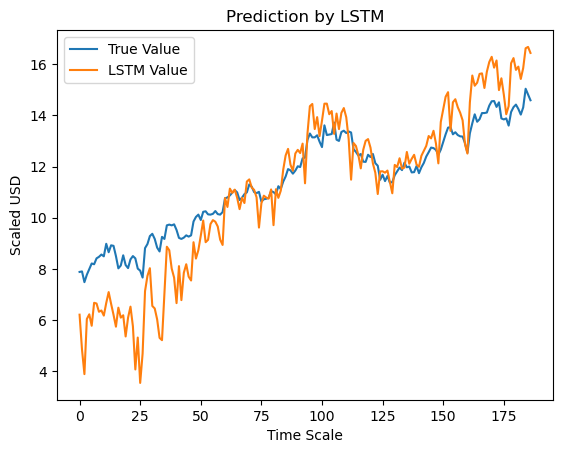

In [53]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2.067000e+03
mean,62.173846,63.069124,61.169052,62.081451,32.862409,9.425112e+07
std,33.724905,34.141159,33.192882,33.637622,29.148934,6.884095e+07
min,19.530000,19.690000,19.030000,19.190000,7.480000,4.138710e+06
25%,35.905000,36.380000,35.300000,35.875000,14.505000,4.939882e+07
50%,50.790000,51.490000,50.100000,50.710000,20.970000,7.441909e+07
75%,86.695000,87.905000,84.680000,86.300000,38.960000,1.154133e+08
max,151.940000,153.450000,149.180000,151.940000,123.550000,6.428460e+08
